In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("kc_house_data.csv")
df.head()
#df.isnull().sum()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1/ Explore our dataset

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

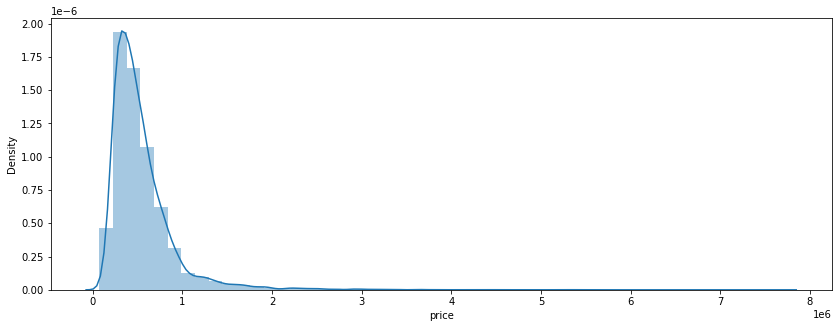

In [25]:
#visualizing house prices
fig = plt.figure(figsize=(14,5))
sns.distplot(df['price'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\l

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

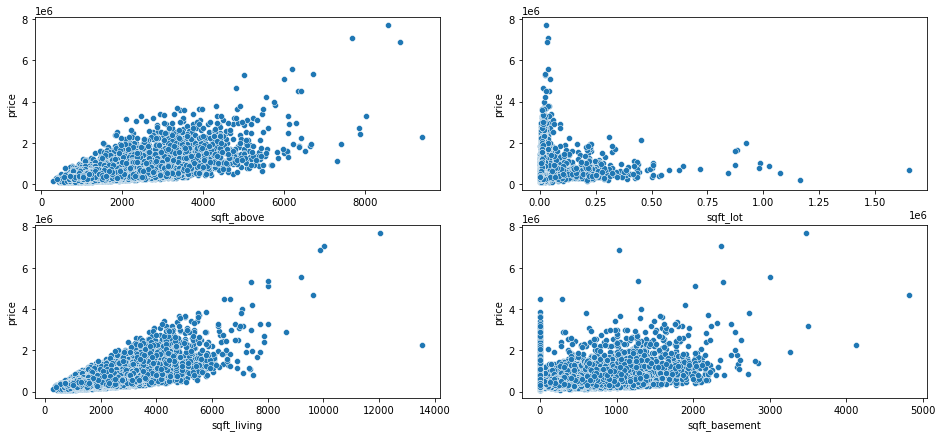

In [32]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,7))
fig.add_subplot(2,2,1)
sns.scatterplot(df['sqft_above'], df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['sqft_lot'],df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['sqft_living'],df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['sqft_basement'],df['price'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-p

<AxesSubplot:xlabel='grade', ylabel='count'>

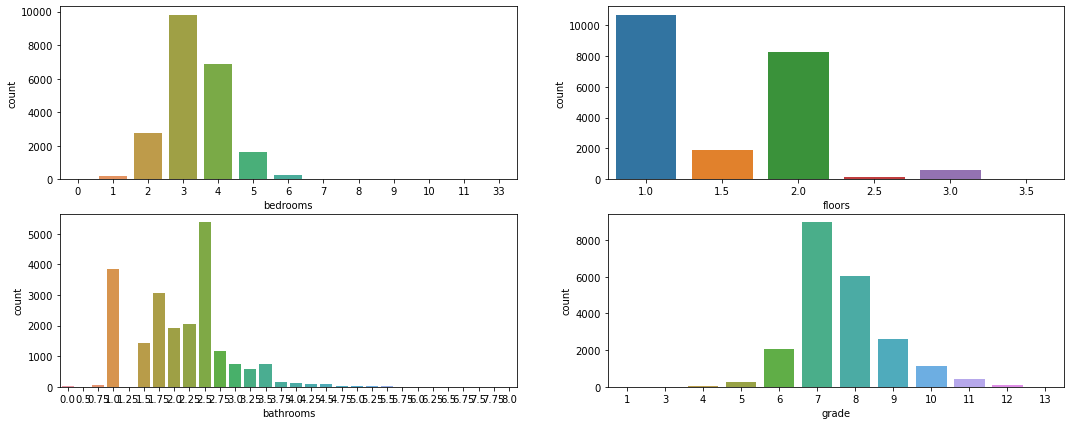

In [35]:
#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(18,7))
fig.add_subplot(2,2,1)
sns.countplot(df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(df['grade'])


# 2/feature selection

2- feature selection is the process of reducing the number of input variables when developing a predictive model by selecting 
   the most useful features in order to improve the performance of the model and to predict the targat variable 
   in our case the feaures that are not useful where they have no effect on the price of houses are: id , date , zipcode , view 
   but the other features have a direct impact on the price of houses , our machine learning model could learn hiidden patterns 
   from these features and predict the price when we test new data 
   
   

# 3/Splitting Dataset

In [55]:
from sklearn.model_selection import train_test_split
# create x and y
x=df['sqft_living'].values[:,np.newaxis]
y = df1['price'].values
#splitting Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)
print(x_train , y_test)

[[ 970]
 [2040]
 [1830]
 ...
 [3230]
 [1930]
 [1120]] [353500. 384950. 340000. ... 760000. 605000. 585000.]


Data is divided into the Train set and Test set , we use training data to make the algorithm learn from theme and cheak 
the accuracy of our model on the Test data.
x(features): The columns that are inserted into our model, our model will learn from theme.
y(target): Target variable that will be predicted by the features

# 4/Apply Linear regression to training set

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#build linear regression model
model=LinearRegression()
#fitting the training data
model.fit(x_train,y_train) 
#after we fit the model, then we have to print all coefficients. ( a and b )
print(model.intercept_)
print(model.coef_)

-46813.8159424396
[282.53959684]


# 5/Plot the linear regression

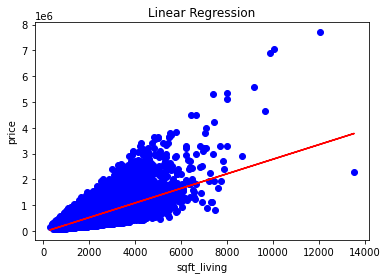

In [59]:
plt.scatter(x,y,color="b")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="r")
plt.show()

-blue points represent the actual  price of houses
-red line represent our predicted values

# 6/ Measure the performance of linear regression using the testing set.

In [62]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 64179676631.68388
R squared 0.4879814110728805


We are using a single feature in the linear model regession we got a mean squared error of 64179676631.68388 after predicting the house’s prices

# 7/Apply multi-linear regression

In [64]:
#we use more than one input
x=df[["sqft_living","bedrooms","sqft_lot"]]  
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 
#build linear regression model
model=LinearRegression()
#fitting the training data
model.fit(x_train,y_train) 
#testing our model’s performance
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62243648137.63871
R squared 0.5048928512940201


R squared of multi- linear regression is bigger thene linear one so we can say that multi liinear regression perform batter thene linear regression and we notice aalso that MSE whiche determines the average of the squared prediction error in lineaa regression is bigger then MSE in  multi- linear regression whiche Confirms what we saiid before

# 8/Apply Polynomial regression 

In [65]:
from sklearn.preprocessing import PolynomialFeatures 
x=df[["sqft_living","bedrooms","sqft_lot"]]  
y=df["price"].values
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))



MSE:  56598451932.636
R squared:  0.5497966620533798


# compare polynomial regression to linear and multilinear regression

we can notice that R squared of polynomial regression is bigger then other two models and MSE of the polynomial regression is less then MSE of multi linear regression and linear regression  so we can say that polynomial regression perform batter then  multi linear regression and linear regression